# Dev IA - Evaluation n°1 - Mars 2022
Ceci est un point d'étape pour évaluer les compétences acquises à ce stade. 
  
Faites une copie de ce notebook, modifiez-le librement puis partager votre travail en fin de session sur Simplonline (veuillez vous assurer que les accès à votre document sont autorisés à des tiers).

## Objectifs
Pour toute les étapes ci-dessous il vous est demandé d'**argumenter vos choix** et d'**expliquer les résultats** obtenus.

* Réaliser une EDA (Exploratory Data Analysis) sur le jeu de données
  - Descrire les données
  - Réaliser une analyse univariée et bivariée

* Réaliser le preprocessing des données
  - Gérer les données manquantes
  - Procéder à la normalisation / encodage

* Entrainer un modèle d'apprentissage supervisé
  - Choisir un modèle répondant aux objectifs du projet
  - Définir les paramètres du modèle
  - Utiliser la validation croisée

* Evaluer le modèle
  - Choisir la ou les métriques d'erreur
  - Valider les performances obtenues

* Conclure
  - Réalisation du projet
  - Difficultés
  - Performance
  - ...

## Bonus
Pour ceux qui veulent aller plus loin, vous pouvez notamment :

* Utiliser un Pipeline
* Procéder à une recherche exhaustive des hyper-paramètres (grid search)
* Procéder à une comparaison de modèles
* Réaliser une prédiction sur des nouvelles données
* Restituer des graphiques pour améliorer la compréhension du projet
* Laisser parler votre intuition ...

## Le jeu de données
Le jeu de données est disponible ci-dessous.  
Il concerne le recensement d'animaux marins (dauphins) selon différentes caractéristiques :
* la cible à prédire est la colonne `variety`
* les features (numériques et catégorielles) sont toutes les autres colonnes :
  - `area` : zone géographique où l'animal réside
  - `dimension_1_mm` : dimension n°1 de l'animal
  - `dimension_2_mm` : dimension n°2 de l'animal
  - `dimension_3_mm` : dimension n°3 de l'animal
  - `mass_g` : masse de l'animal
  - `sex` : genre de l'animal

# Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# GridSearch
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay


# Util
import pickle

# Importation des données

In [2]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.describe(include='all')

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Tropicalis,Caraibean,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variety         344 non-null    object 
 1   area            344 non-null    object 
 2   dimension_1_mm  342 non-null    float64
 3   dimension_2_mm  342 non-null    float64
 4   dimension_3_mm  342 non-null    float64
 5   mass_g          342 non-null    float64
 6   sex             334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# Nombre de valeurs null
df.isna().sum()

variety            0
area               0
dimension_1_mm     2
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64

Des valeurs sont manquantes sur le dataset, nettoyage est nécessaire

# Nettoyage dataset

In [8]:
df.dropna(inplace = True) # Supprime les données manquantes
#df.drop(['colonne1', 'colonne2','etc...'],axis=1,inplace=True) # Supprimer des colonnes
#df.rename(columns={"v1": "target", "v2": "text"},inplace=True) # Renommer des colonnes
#df.drop_duplicates(inplace=True) # Suppression des doublons

In [9]:
df.shape

(334, 7)

10 lignes néttoyées

# EDA

### Récapitulatif :
variable target : variety <br>
lignes et colonnes : 334, 7 <br>
types de variables : quantitatives 4, qualitatives : 3

Note : Nous cherchons ici à predire une classe (variety), c'est donc un algorithme supervisé de classification qui sera utilisé

### Analyse de fond <br>
1. Visualisation de la target

In [10]:
df['variety'].value_counts(normalize=True)

Tropicalis    0.437126
Peale         0.359281
Chinensis     0.203593
Name: variety, dtype: float64

Répartition des classes

Tropicalis : 44 % </br>
Peale : 36 % </br>
Chinensis : 20 % </br>

 2. Signification des variables
 
**Distribution des variables continues**

<Figure size 1800x1080 with 0 Axes>

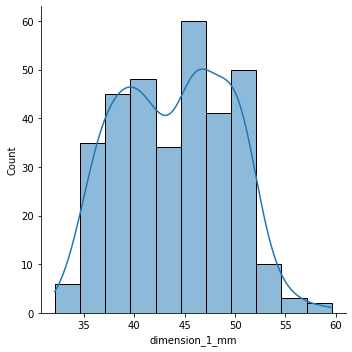

<Figure size 1800x1080 with 0 Axes>

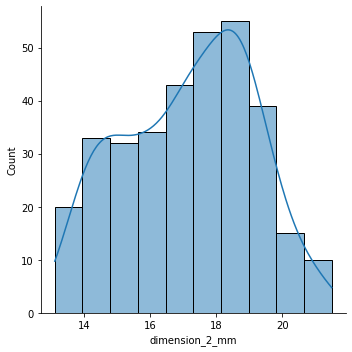

<Figure size 1800x1080 with 0 Axes>

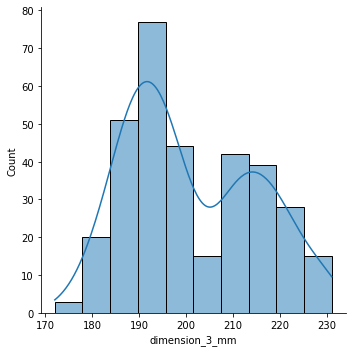

<Figure size 1800x1080 with 0 Axes>

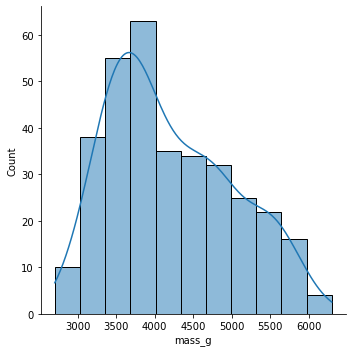

In [11]:
for col in df.select_dtypes(include=['float', 'int']):
    plt.figure()
    plt.gcf().set_size_inches(25, 15)
    sns.displot(df[col],kde=True)

**Analyse des variables qualitatives**

In [12]:
for col in df.select_dtypes(include='object'):
    print(f'{col :-<20} {df[col].unique()}')

variety------------- ['Tropicalis' 'Chinensis' 'Peale']
area---------------- ['Artic' 'Caraibean' 'Pacific']
sex----------------- ['MALE' 'FEMALE' '.']


On note ici dans la variable sex une erreur '.'

In [13]:
df[df['sex'] == '.']

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
336,Peale,Caraibean,44.5,15.7,217.0,4875.0,.


In [14]:
df.drop(336,inplace = True)

La ligne en defaut est supprimée par son index

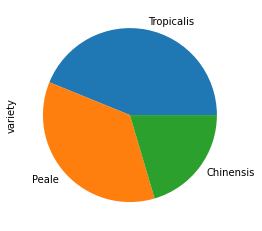

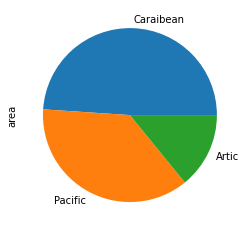

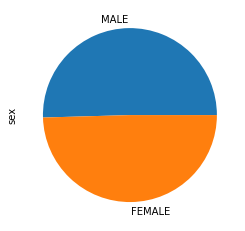

In [15]:
for col in df.select_dtypes(include='object'):
    plt.figure()
    autopct = lambda x: str(round(x, 2)) + '%',
    pctdistance = 0.7 
    df[col].value_counts().plot.pie() # graphique camembert

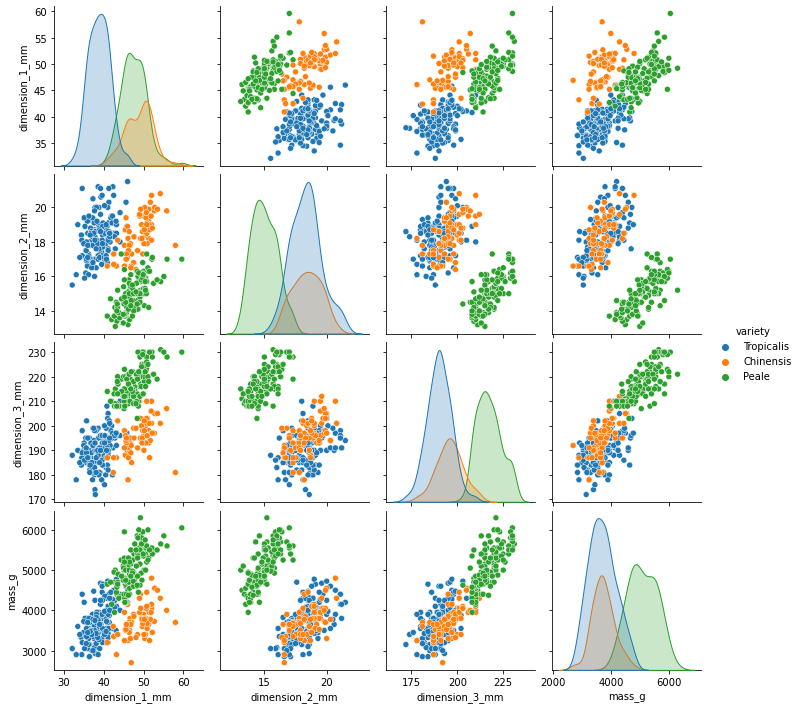

In [16]:
sns.pairplot(data=df, hue='variety')

Remarque concernant l'EDA : Pas d'outliers

Proposition d'une normalision minmax en conséquences sur les variables continus

# Model

In [18]:
# Classe reutilisable
class ClassificationModel():
    
    # constructeur
    def __init__(self,df,model):
        self.df = df
        self.model = model
        self.X = self.df.drop('variety',axis = 1) # exclusion de la target
        
    def buildPipeline(self):
        
        # Encodage target
        self.labelEncoder = LabelEncoder() # On garde le LabelEncoder() pour transformer la prediction 
        self.y = self.labelEncoder.fit_transform(df['variety'])
        
        categorical_columns = self.X.select_dtypes(include=['object']).columns
        numerical_columns = self.X.select_dtypes(include=['float', 'int']).columns
        
        transfo_cat = Pipeline(steps=[
            #('imputation', SimpleImputer(strategy='most_frequent')), Donnees manquantes ? a voir
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
        ])
                                                 
        transfo_num = Pipeline(steps=[
            ('scaling', MinMaxScaler())
        ])
        
        preparation = ColumnTransformer(
            transformers=[
                ('data_cat', transfo_cat , categorical_columns),
                ('data_num', transfo_num , numerical_columns)
            ])
        
        self.pipe = Pipeline(steps=[
            ('encoder',preparation),
            ('modelisation', self.model)
        ])
        
    def showPipeline(self):
        print(self.pipe)
        
    def splitData(self):
        # Preparation pour entrainement
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X,
            self.y,
            stratify=self.y, 
            test_size=0.25, 
            random_state=42
        )
        
    def fitModel(self):
        self.pipe.fit(self.X_train, self.y_train)
        
    def showScore(self):
        self.y_pred = self.pipe.predict(self.X_test)
        score = accuracy_score(self.y_test, self.y_pred)
        print(self.model,'score : ', round(score, 5)*100,' %')
        
    def showConfusionMatrix(self):
        
        cm = confusion_matrix(self.y_test, self.y_pred)
        
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm,
            display_labels=['Tropicalis','Chinensis','Peale']
        )
        
        disp.plot()
        plt.show()
        
    def showXtrain(self):
        print(self.X_train)
    
    def showXtest(self):
        print(self.X_test)
    
    def showYtrain(self):
        print(self.y_train)
    
    def showYtest(self):
        print(self.y_test)
        
    def showScoreGridSearchCVForKNN(self):
        
        knn = KNeighborsClassifier()
        print(knn.get_params().keys())
        params = {
            'model__n_neighbors': [5, 7, 10,12]
        }

        # On retire le dernier step du pipeline (le modele) pour ajouter le KNN par defaut
        self.pipe.steps.pop(1)
        self.pipe.steps.append(['model',knn])
        
        self.grid = GridSearchCV(self.pipe, param_grid=params, cv=10,scoring='accuracy',return_train_score=False,verbose=1)
        self.grid.fit(self.X_train, self.y_train)
        print(self.grid.best_score_)
        print(self.grid.best_params_)
        
    def showPredict(self,X_new):
        classe = self.pipe.predict(X_new)
        print(self.labelEncoder.inverse_transform(classe))
        
    def showPredictProba(self,X_new):
        print(self.pipe.predict_proba(X_new))
        
    def getPipeline(self):
        # Retourne le pipeline pour l'export
        return self.pipe 

In [19]:
model = ClassificationModel(df,KNeighborsClassifier(n_neighbors=3))

In [20]:
model.buildPipeline()

In [21]:
model.showPipeline()

Pipeline(steps=[('encoder',
                 ColumnTransformer(transformers=[('data_cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['area', 'sex'], dtype='object')),
                                                 ('data_num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g'], dtype='object'))])),
                ('modelisation', KNeighborsClassifier(n_neighbors=3))])


In [22]:
model.splitData()

In [23]:
model.fitModel()

In [24]:
model.showScore()

KNeighborsClassifier(n_neighbors=3) score :  98.81  %


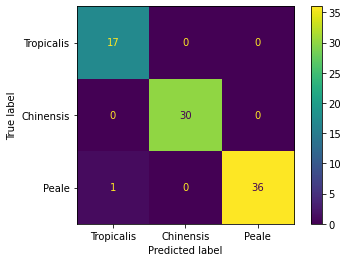

In [25]:
model.showConfusionMatrix()

# GridSearchCV

Cherchons les meilleurs paramètres pour notre modèle KNN

In [26]:
model.showScoreGridSearchCVForKNN()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.9960000000000001
{'model__n_neighbors': 7}


Avec 7 voisins plus proches, nous améliorons le score de notre modèle...essayons !

Voici l'intérêt des classes !

In [29]:
model_with_7knn = ClassificationModel(df,KNeighborsClassifier(n_neighbors=7))
model_with_7knn.buildPipeline()
model_with_7knn.showPipeline
model_with_7knn.splitData()
model_with_7knn.fitModel()
model_with_7knn.showScore()

KNeighborsClassifier(n_neighbors=7) score :  100.0  %


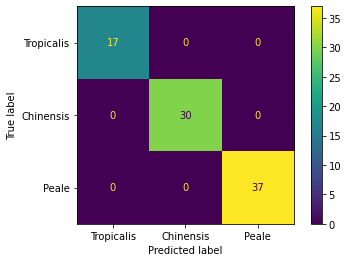

In [30]:
model_with_7knn.showConfusionMatrix()

Parfait !

Prédiction du modèle avant export Flask

In [32]:
# Test
dic = {
    'area': 'Pacific',
    'dimension_1_mm':50,
    'dimension_2_mm':20,
    'dimension_3_mm':190,
    'mass_g':4000,
    'sex':'MALE'
}
df_predict = pd.DataFrame(dic, index=[0])
model_with_7knn.showPredict(df_predict)

['Chinensis']


In [33]:
model_with_7knn.showPredictProba(df_predict)

[[1. 0. 0.]]


# Export pour flask

In [34]:
pickle.dump(model_with_7knn.getPipeline(),open('model.pkl','wb'))

**Fin de projet**

http://victorien.pythonanywhere.com/

TODO A suivre...

Avec un modèle RandomForest/Logistic regression/SVM etc... <br/>
*Remarque : ceci peut se faire en quelques minutes en remplacant le modele en paramètre de la classe* <br/><br/>
Conterisation de l'application Flask <br/>